In [3]:
# Import necessary libraries\n
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from google.colab import drive
## Checking the installed tensorflow version  --> why we need >2.0?
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.9/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [4]:
#Mount Google Drive to access the dataset

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
# Set up the file paths for the dataset folders for each UAV\n",
uav1_path = '/content/gdrive/MyDrive/Dataset UAVs/UAV_1'
uav2_path = '/content/gdrive/MyDrive/Dataset UAVs/UAV_1'
uav3_path = '/content/gdrive/MyDrive/Dataset UAVs/UAV_1'

In [6]:
# define the image size, batch size, and number of epochs\n",
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 15

In [7]:
# Set up the ImageDataGenerator for data augmentation\n",
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

In [8]:
# Set up the training data generators for  UAV 1
train_gen_uav1 = datagen.flow_from_directory(
                                    uav1_path,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training')

# Set up the validation data generators for  UAV 1
val_gen_uav1 = datagen.flow_from_directory(
                                    uav1_path,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')

# Set up the training data generators for  UAV 2
train_gen_uav2 = datagen.flow_from_directory(
                                    uav2_path,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training')

# Set up the validation data generators for  UAV 2
val_gen_uav2 = datagen.flow_from_directory(
                                    uav2_path,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')

# Set up the training data generators for  UAV 3
train_gen_uav3 = datagen.flow_from_directory(
                                    uav3_path,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='training')

# Set up the validation data generators for  UAV 3
val_gen_uav3 = datagen.flow_from_directory(
                                    uav3_path,
                                    target_size=IMG_SIZE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='categorical',
                                    subset='validation')

Found 2178 images belonging to 3 classes.
Found 542 images belonging to 3 classes.
Found 2178 images belonging to 3 classes.
Found 542 images belonging to 3 classes.
Found 2178 images belonging to 3 classes.
Found 542 images belonging to 3 classes.


In [9]:
# define the model architecture for UAV_1 with 3 Convolutional layers
model_UAV1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3,strides= (3,3),
padding='same',activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
# Compile the model for UAV_1
model_UAV1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!pip install pydot
!pip install graphviz
!apt-get install graphviz
from keras.utils.vis_utils import plot_model

## Plotting CNN Architecture Model for UAV_1 for Visualization
plot_model(model_UAV1, to_file='cnn_model_UAV1.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras
import tensorflow as tf
import visualkeras
visualkeras.layered_view(model_UAV1, to_file='model_UAV1(Visualkeras).png')


In [11]:
# define the model architecture for UAV_2 with 4 Convolutional layers
model_UAV2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [12]:
# Compile the model for UAV_2
model_UAV2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!pip install pydot
!pip install graphviz
!apt-get install graphviz
from keras.utils.vis_utils import plot_model

## Plotting CNN Architecture Model for UAV_1 for Visualization
plot_model(model_UAV2, to_file='cnn_model_UAV2.png', show_shapes=True, show_layer_names=True)


In [ ]:
!pip install visualkeras
import tensorflow as tf
import visualkeras
visualkeras.layered_view(model_UAV2, to_file='model_UAV2(Visualkeras).png')

In [13]:
# define the model architecture for UAV_3 with 2 Convolutional layers
model_UAV3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [14]:
# Compile the model for UAV_3
model_UAV3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!pip install pydot
!pip install graphviz
!apt-get install graphviz
from keras.utils.vis_utils import plot_model

## Plotting CNN Architecture Model for UAV_1 for Visualization
plot_model(model_UAV3, to_file='cnn_model_UAV3.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras
import tensorflow as tf
import visualkeras
visualkeras.layered_view(model_UAV3, to_file='model_UAV3(Visualkeras).png')

In [21]:
# Train the model on UAV 1
import time
import torch

start_time1 = time.time()
history1 = model_UAV1.fit(
    train_gen_uav1,
    epochs=EPOCHS,
    validation_data=val_gen_uav1
    )
end_time1 = time.time()
total_time1 = end_time1 - start_time1

# Train the model on UAV 2

start_time2 = time.time()

# Train the model on UAV 2
history2 = model_UAV2.fit(
    train_gen_uav2,
    epochs=EPOCHS,
    validation_data=val_gen_uav2
    )

end_time2 = time.time()
total_time2 = end_time2 - start_time2
print(f"Total execution time for Training UAV_2 Model: {total_time2:.2f} seconds")

# Train the model on UAV 3

start_time3 = time.time()
history3 = model_UAV3.fit(
    train_gen_uav3,
    epochs=EPOCHS,
    validation_data=val_gen_uav3
    )

end_time3 = time.time()
total_time3 = end_time3 - start_time3
print(f"Total execution time for Training UAV_3 Model: {total_time3:.2f} seconds")


Epoch 1/15
69/69 [==============================] - 610s 9s/step - loss: 0.5427 - accuracy: 0.7865 - val_loss: 0.7556 - val_accuracy: 0.6328
Epoch 2/15
69/69 [==============================] - 143s 2s/step - loss: 0.3621 - accuracy: 0.8705 - val_loss: 0.5457 - val_accuracy: 0.6863
Epoch 3/15
69/69 [==============================] - 130s 2s/step - loss: 0.3123 - accuracy: 0.8898 - val_loss: 0.2904 - val_accuracy: 0.8985
Epoch 4/15
69/69 [==============================] - 143s 2s/step - loss: 0.3122 - accuracy: 0.8967 - val_loss: 0.3106 - val_accuracy: 0.8911
Epoch 5/15
69/69 [==============================] - 130s 2s/step - loss: 0.2491 - accuracy: 0.9114 - val_loss: 0.2338 - val_accuracy: 0.9207
Epoch 6/15
69/69 [==============================] - 144s 2s/step - loss: 0.2372 - accuracy: 0.9164 - val_loss: 0.2136 - val_accuracy: 0.9299
Epoch 7/15
69/69 [==============================] - 143s 2s/step - loss: 0.2286 - accuracy: 0.9270 - val_loss: 0.3159 - val_accuracy: 0.8930
Epoch 8/15
69

In [ ]:
# Train the model on UAV 1
import time
import torch
start_time1 = time.time()
history1 = model_UAV1.fit(
    train_gen_uav1,
    epochs=EPOCHS,
    validation_data=val_gen_uav1
    )
end_time1 = time.time()
total_time1 = end_time1 - start_time1
print(f"Total execution time for Training UAV_1 Model: {total_time1:.2f} seconds")

# save the model for UAV_1
torch.save(history1, '/content/gdrive/MyDrive/Python Code/Models/history1.pth')

Epoch 1/15
69/69 [==============================] - 404s 6s/step - loss: 0.6399 - accuracy: 0.7452 - val_loss: 0.4238 - val_accuracy: 0.7638
Epoch 2/15
69/69 [==============================] - 147s 2s/step - loss: 0.3820 - accuracy: 0.8678 - val_loss: 0.3257 - val_accuracy: 0.8875
Epoch 3/15
69/69 [==============================] - 150s 2s/step - loss: 0.3010 - accuracy: 0.9073 - val_loss: 0.2953 - val_accuracy: 0.9077
Epoch 4/15
69/69 [==============================] - 147s 2s/step - loss: 0.3073 - accuracy: 0.8953 - val_loss: 0.3538 - val_accuracy: 0.8542
Epoch 5/15
69/69 [==============================] - 147s 2s/step - loss: 0.2602 - accuracy: 0.9118 - val_loss: 0.2812 - val_accuracy: 0.9022
Epoch 6/15
69/69 [==============================] - 150s 2s/step - loss: 0.2396 - accuracy: 0.9206 - val_loss: 0.2199 - val_accuracy: 0.9299
Epoch 7/15
69/69 [==============================] - 147s 2s/step - loss: 0.2163 - accuracy: 0.9215 - val_loss: 0.2092 - val_accuracy: 0.9317
Epoch 8/15
69

In [ ]:
# Train the model on UAV 2
import time
import torch
start_time2 = time.time()
# Train the model on UAV 2
history2 = model_UAV2.fit(
    train_gen_uav2,
    epochs=EPOCHS,
    validation_data=val_gen_uav2
    )

end_time2 = time.time()
total_time2 = end_time2 - start_time2
print(f"Total execution time for Training UAV_2 Model: {total_time2:.2f} seconds")

# save the model for UAV_2
torch.save(history2, '/content/gdrive/MyDrive/Python Code/Models/history2.pth')

Epoch 1/15
69/69 [==============================] - 560s 8s/step - loss: 0.6400 - accuracy: 0.7851 - val_loss: 0.2627 - val_accuracy: 0.9170
Epoch 2/15
69/69 [==============================] - 584s 8s/step - loss: 0.3984 - accuracy: 0.8554 - val_loss: 0.3941 - val_accuracy: 0.8376
Epoch 3/15
69/69 [==============================] - 552s 8s/step - loss: 0.2952 - accuracy: 0.8972 - val_loss: 0.3269 - val_accuracy: 0.8875
Epoch 4/15
69/69 [==============================] - 554s 8s/step - loss: 0.2503 - accuracy: 0.9192 - val_loss: 0.2140 - val_accuracy: 0.9262
Epoch 5/15
69/69 [==============================] - 584s 8s/step - loss: 0.2168 - accuracy: 0.9247 - val_loss: 0.3119 - val_accuracy: 0.8801
Epoch 6/15
69/69 [==============================] - 578s 8s/step - loss: 0.2109 - accuracy: 0.9288 - val_loss: 0.3208 - val_accuracy: 0.8985
Epoch 7/15
69/69 [==============================] - 579s 8s/step - loss: 0.1856 - accuracy: 0.9394 - val_loss: 0.3248 - val_accuracy: 0.8672
Epoch 8/15
69

In [ ]:
# Train the model on UAV 3
import time
import torch
start_time3 = time.time()
history3 = model_UAV3.fit(
    train_gen_uav3,
    epochs=EPOCHS,
    validation_data=val_gen_uav3
    )

end_time3 = time.time()
total_time3 = end_time3 - start_time3
print(f"Total execution time for Training UAV_3 Model: {total_time3:.2f} seconds")

# save the model for UAV_3
torch.save(history3, '/content/gdrive/MyDrive/Python Code/Models/history3.pth')


In [23]:
import torch

# Load the model from Google Drive for UAV_1
History_UAV1 = torch.load('/content/gdrive/MyDrive/Python Code/Models/history1.pth')

# Load the model from Google Drive for UAV_2
History_UAV2 = torch.load('/content/gdrive/MyDrive/Python Code/Models/history2.pth')

# Load the model from Google Drive for UAV_3
History_UAV3 = torch.load('/content/gdrive/MyDrive/Python Code/Models/history3.pth')

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-23 08:57:42           64
config.json                                    2023-03-23 08:57:42         3990
variables.h5                                   2023-03-23 08:57:42     17091656
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
..

FileNotFoundError: ignored

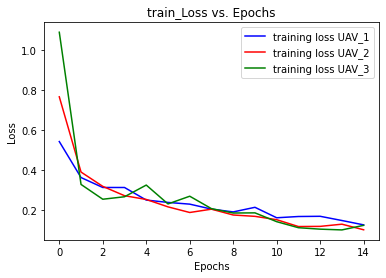

In [24]:
# Plot the training loss vs. epochs  for UAV_1  & UAV_2 & UAV_3
plt.plot(history1.history['loss'],'b', label='training loss UAV_1')     # 'b--' for blue broken line
plt.plot(history2.history['loss'],'r', label='training loss UAV_2')     # 'y--' for red broken line
plt.plot(history3.history['loss'],'g', label='training loss UAV_3')     # 'y--' for green broken line
plt.title('train_Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

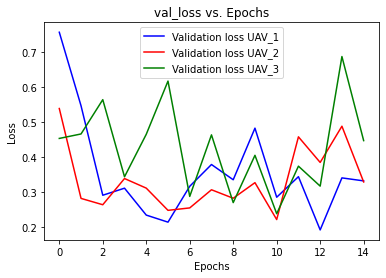

In [25]:
# Plot the Validation loss vs. epochs  for UAV_1  & UAV_2 & UAV_3
plt.plot(history1.history['val_loss'],'b', label='Validation loss UAV_1')     # 'bo' for blue broken line
plt.plot(history2.history['val_loss'],'r', label='Validation loss UAV_2')     # 'bo' for red broken line 
plt.plot(history3.history['val_loss'],'g', label='Validation loss UAV_3')     # 'bo' for green broken line
plt.title('val_loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

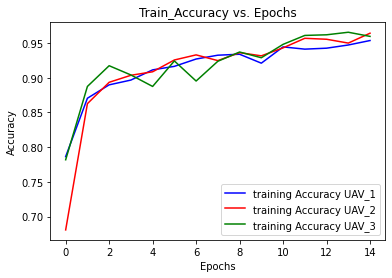

In [26]:
# Plot the Training Accuracy vs. epochs  for UAV_1  & UAV_2 & UAV_3
plt.plot(history1.history['accuracy'],'b', label='training Accuracy UAV_1')     # 'bo' for blue dots
plt.plot(history2.history['accuracy'],'r', label='training Accuracy UAV_2')     # 'yo' for red dots
plt.plot(history3.history['accuracy'],'g', label='training Accuracy UAV_3')     # 'yo' for green dots
plt.title('Train_Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

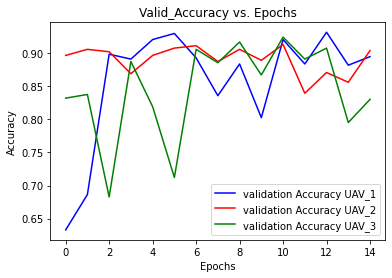

In [27]:
# Plot the Validation Accuracy vs. epochs  for UAV_1  & UAV_2 & UAV_3
plt.plot(history1.history['val_accuracy'],'b', label='validation Accuracy UAV_1') # 'b' for blue line
plt.plot(history2.history['val_accuracy'],'r', label='validation Accuracy UAV_2') # 'y' for red line
plt.plot(history3.history['val_accuracy'],'g', label='validation Accuracy UAV_3') # 'y' for green line
plt.title('Valid_Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Get the training and validation losses for UAV_1
train_loss1 = History_UAV1.history['loss']
val_loss1 = History_UAV1.history['val_loss']

# Get the training and validation accuracies for UAV_1
train_acc1 = History_UAV1.history['accuracy']
val_acc1 = History_UAV1.history['val_accuracy']

In [33]:
import numpy as np

# Concatenate all batches of validation data generated by the data generator
val_data_uav1 = None
val_labels_uav1 = None
for i in range(len(val_gen_uav1)):
    batch_data, batch_labels = val_gen_uav1[i]
    if val_data_uav1 is None:
        val_data_uav1 = batch_data
        val_labels_uav1 = batch_labels
    else:
        val_data_uav1 = np.concatenate([val_data_uav1, batch_data])
        val_labels_uav1 = np.concatenate([val_labels_uav1, batch_labels])

# Use the concatenated validation data array for predictions
predictions1 = model_UAV1.predict(val_data_uav1, batch_size=256, verbose=0)

#Rounding the Decimal Values to the correct label
Rounded_Predictions1=[]
for arr in predictions1:
  if arr[0]>arr[1] and arr[0]>arr[2]:
    Rounded_Predictions1.append([1,0,0])
  elif arr[1]>arr[0] and arr[1]>arr[2]:
    Rounded_Predictions1.append([0,1,0])
  else:
    Rounded_Predictions1.append([0,0,1])

Rounded_Predictions1

[[1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0,

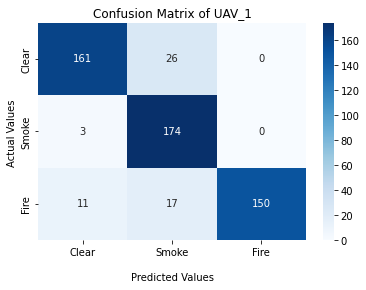

In [34]:
import numpy as np
Rounded_Predictions1=np.array(Rounded_Predictions1)

#Counfusion Matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# CM--> Confusion Matrix (testing_set_label and Rounded_Predictions)
cm1=confusion_matrix(val_labels_uav1.argmax(axis=1),Rounded_Predictions1.argmax(axis=1))
cm1

ax1 = sns.heatmap(cm1, annot=True,fmt='.0f', cmap='Blues')

ax1.set_title('Confusion Matrix of UAV_1');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax1.xaxis.set_ticklabels(['Clear','Smoke','Fire'])
ax1.yaxis.set_ticklabels(['Clear','Smoke','Fire'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [36]:
import numpy as np

# Concatenate all batches of validation data generated by the data generator
val_data_uav2 = None
val_labels_uav2 = None
for i in range(len(val_gen_uav2)):
    batch_data, batch_labels = val_gen_uav2[i]
    if val_data_uav2 is None:
        val_data_uav2 = batch_data
        val_labels_uav2 = batch_labels
    else:
        val_data_uav2 = np.concatenate([val_data_uav2, batch_data])
        val_labels_uav2 = np.concatenate([val_labels_uav2, batch_labels])

# Use the concatenated validation data array for predictions
predictions2 = model_UAV2.predict(val_data_uav2, batch_size=256, verbose=0)

#Rounding the Decimal Values to the correct label
Rounded_Predictions2=[]
for arr in predictions2:
  if arr[0]>arr[1] and arr[0]>arr[2]:
    Rounded_Predictions2.append([1,0,0])
  elif arr[1]>arr[0] and arr[1]>arr[2]:
    Rounded_Predictions2.append([0,1,0])
  else:
    Rounded_Predictions2.append([0,0,1])

Rounded_Predictions2

[[1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0,

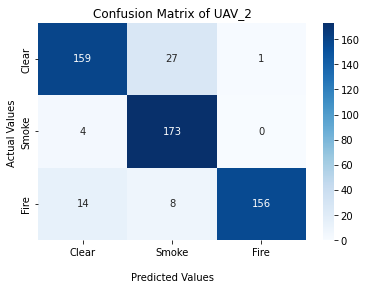

In [37]:
import numpy as np
Rounded_Predictions2=np.array(Rounded_Predictions2)

#Counfusion Matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# CM--> Confusion Matrix (testing_set_label and Rounded_Predictions)
cm2=confusion_matrix(val_labels_uav2.argmax(axis=1),Rounded_Predictions2.argmax(axis=1))
cm2

ax2 = sns.heatmap(cm2, annot=True,fmt='.0f', cmap='Blues')

ax2.set_title('Confusion Matrix of UAV_2');
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax2.xaxis.set_ticklabels(['Clear','Smoke','Fire'])
ax2.yaxis.set_ticklabels(['Clear','Smoke','Fire'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
import numpy as np

# Concatenate all batches of validation data generated by the data generator
val_data_uav3 = None
val_labels_uav3 = None
for i in range(len(val_gen_uav3)):
    batch_data, batch_labels = val_gen_uav3[i]
    if val_data_uav3 is None:
        val_data_uav3 = batch_data
        val_labels_uav3 = batch_labels
    else:
        val_data_uav3 = np.concatenate([val_data_uav3, batch_data])
        val_labels_uav3 = np.concatenate([val_labels_uav3, batch_labels])

# Use the concatenated validation data array for predictions
predictions3 = model_UAV3.predict(val_data_uav3, batch_size=256, verbose=0)

#Rounding the Decimal Values to the correct label
Rounded_Predictions3=[]
for arr in predictions3:
  if arr[0]>arr[1] and arr[0]>arr[2]:
    Rounded_Predictions3.append([1,0,0])
  elif arr[1]>arr[0] and arr[1]>arr[2]:
    Rounded_Predictions3.append([0,1,0])
  else:
    Rounded_Predictions3.append([0,0,1])

Rounded_Predictions3

[[1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0,

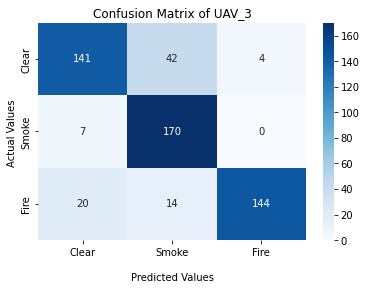

In [39]:
import numpy as np
Rounded_Predictions3=np.array(Rounded_Predictions3)

#Counfusion Matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# CM--> Confusion Matrix (testing_set_label and Rounded_Predictions)
cm3=confusion_matrix(val_labels_uav3.argmax(axis=1),Rounded_Predictions3.argmax(axis=1))
cm3

ax3 = sns.heatmap(cm3, annot=True,fmt='.0f', cmap='Blues')

ax3.set_title('Confusion Matrix of UAV_3');
ax3.set_xlabel('\nPredicted Values')
ax3.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax3.xaxis.set_ticklabels(['Clear','Smoke','Fire'])
ax3.yaxis.set_ticklabels(['Clear','Smoke','Fire'])

## Display the visualization of the Confusion Matrix.
plt.show()